### Proyecto de nacimientos en México en 2023

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('classic')


Cargamos los datos, donde uno es la base de datos y el otro archivo es el diccionario de los datos

In [2]:
df_datos = pd.read_csv('datos.csv', sep=',')

In [3]:
df_diccionario = pd.read_csv('diccionario.csv', sep=',')
df_diccionario

,#,nombre_campo,longitud,tipo,nemonico,catalogo,rango_claves
0,1,Entidad de registro,2,C,ent_regis,catemlna23,01..32
1,2,Municipio o demarcaciÃ³n territorial de registro,3,C,mun_regis,catemlna23,001..570
2,3,Localidad de registro,4,C,loc_regis,catemlna23,"0001..6999,7777,9999"
3,4,TamaÃ±o de localidad de registro,2,N,tloc_regis,tamaÃ±o_localidad,"1..17,99"
4,5,Entidad de residencia habitual de la madre,2,C,ent_resid,catemlna23,01..35
5,6,Municipio o demarcaciÃ³n territorial de reside...,3,C,mun_resid,catemlna23,"001..570,999"
6,7,Localidad de residencia habitual de la madre,4,C,loc_resid,catemlna23,"0001..6999,7777,9999"
7,8,TamaÃ±o de localidad de residencia habitual de...,2,N,tloc_resid,tamaÃ±o_localidad,"1..17,99"
8,9,Entidad de ocurrencia,2,C,ent_ocurr,catemlna23,01..35
9,10,Municipio o demarcaciÃ³n territorial de ocurr...,3,C,mun_ocurr,catemlna23,"001..570, 999"


Dado que la base de datos es muy grande y con muchos campos, delimitaremos el estudio con menos campos. Vamos a utilizar los campos de entidad de resgistro (ent_regis), Sexo del registrado (sexo), Mes de ocurrencia (mes_nac), Edad de la madre al momento del nacimiento (edad_madn) y Edad del padre al momento del nacimiento (edad_padn)

In [4]:
datos = ["ent_regis", "mes_nac", "sexo", "edad_madn", "edad_padn"]
df_datos1 = df_datos[datos]
df_datos1.head(10)

,ent_regis,mes_nac,sexo,edad_madn,edad_padn
0,1,99,2,99,99
1,1,3,2,21,99
2,1,3,1,32,33
3,1,3,1,29,33
4,1,3,1,33,99
5,1,3,1,28,99
6,1,1,1,24,30
7,1,9,1,34,37
8,1,2,1,31,99
9,1,8,1,99,99


#### Análisis por estado 
En este caso lo haremos con Chiapas

In [17]:
df_chiapas = df_datos1[df_datos1['ent_regis'] == 7]
hombres = df_chiapas[df_chiapas['sexo'] == 1]
mujeres = df_chiapas[df_chiapas['sexo'] == 2]

(-0.9999998310832499,
 0.9999974789607001,
 -0.9999997950777852,
 0.9999980284268625)

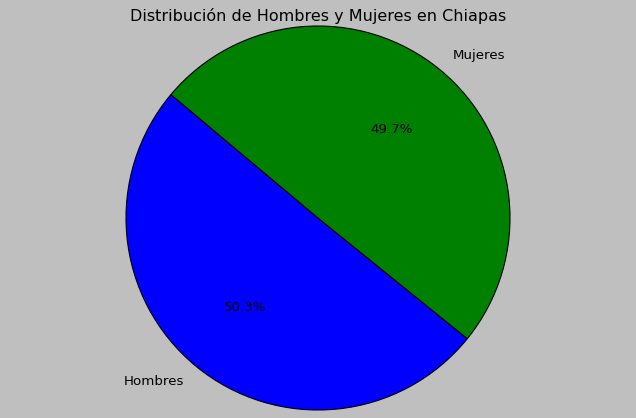

In [21]:
# Gráfica de pie
plt.figure(figsize=(10, 6))
plt.pie([len(hombres), len(mujeres)], labels=['Hombres', 'Mujeres'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Hombres y Mujeres en Chiapas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

Ahora hacemos el analisis de nacimientos por mes 


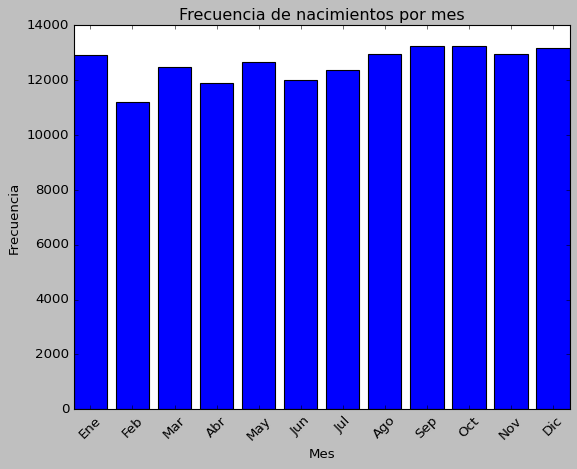

In [22]:
df_chiapas.sort_values(by="mes_nac")
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
meses_frec = []
for i in range(1, 13):
    cuenta = (df_chiapas['mes_nac'] == i).sum()
    meses_frec.append(cuenta)
meses_frec
plt.bar(meses, meses_frec)
plt.xlabel("Mes")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de nacimientos por mes")
plt.xticks(meses, rotation=45)
plt.show()